# Import Libraries

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op
import math
import torch

## Inverter
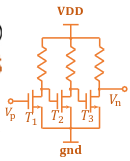

### Read Data

Faulty Circuit

In [6]:
data = pandas.read_csv('./neg_fault.csv')
data

,X,/R1_open Y,/R1_short Y,/R2_open Y,/R2_short Y,/R3_open Y,/R3_short Y,/M1_G-S_short Y,/M1_open Y,/M1_G-D_short Y,/M1_D-S_short Y,/M2_D-S_short Y,/M2_G-D_short Y,/M2_G-S_short Y,/M2_open Y,/M3_open Y,/M3_D-S_short Y,/M3_G-D_short Y,/M3_G-S_short Y
0,-2.000,-0.839072,0.606441,0.999919,-0.839073,-31.4819,1,0.532221,0.606441,-0.839072,-0.839072,0.999919,-0.772894,-0.839072,-0.839073,1,-1,-0.680590,0.999919
1,-1.999,-0.839072,0.606470,0.999919,-0.839073,-31.4819,1,0.532253,0.606470,-0.839072,-0.839072,0.999919,-0.772832,-0.839072,-0.839073,1,-1,-0.680590,0.999919
2,-1.998,-0.839072,0.606470,0.999919,-0.839073,-31.4819,1,0.532286,0.606470,-0.839072,-0.839072,0.999919,-0.772832,-0.839072,-0.839073,1,-1,-0.680590,0.999919
3,-1.997,-0.839072,0.606470,0.999919,-0.839073,-31.4819,1,0.532318,0.606470,-0.839072,-0.839072,0.999919,-0.772832,-0.839072,-0.839073,1,-1,-0.680590,0.999919
4,-1.996,-0.839072,0.606470,0.999919,-0.839073,-31.4819,1,0.532350,0.606470,-0.839072,-0.839072,0.999919,-0.772832,-0.839072,-0.839073,1,-1,-0.680590,0.999919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,1.996,-0.839072,0.606470,0.999919,-0.839073,-31.4876,1,0.646813,0.606470,0.700164,-0.839072,0.999919,-0.756610,-0.839072,-0.839073,1,-1,0.800554,0.999919
3997,1.997,-0.839072,0.606470,0.999919,-0.839073,-31.4876,1,0.646888,0.606470,0.700228,-0.839072,0.999919,-0.756605,-0.839072,-0.839073,1,-1,0.800555,0.999919
3998,1.998,-0.839072,0.606470,0.999919,-0.839073,-31.4876,1,0.646964,0.606470,0.700292,-0.839072,0.999919,-0.756599,-0.839072,-0.839073,1,-1,0.800557,0.999919
3999,1.999,-0.839072,0.606470,0.999919,-0.839073,-31.4876,1,0.647039,0.606470,0.700355,-0.839072,0.999919,-0.756594,-0.839072,-0.839073,1,-1,0.800558,0.999919


Non Faulty Circuit

In [2]:
nfault_data = pandas.read_csv('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/p-neg_wt_non-faulty_vout.csv')
nfault_data

,vin,/VOUT (V)
0,-2.000,0.9981
1,-1.999,0.9981
2,-1.998,0.9981
3,-1.997,0.9981
4,-1.996,0.9981
...,...,...
3997,1.997,-0.9068
3998,1.998,-0.9068
3999,1.999,-0.9068
4000,2.000,-0.9068


18 differnt states if fault happend to inverter

In [ ]:
a = torch.tensor(data.to_numpy())[:,1:]
a.shape

non faulty invertor

In [3]:
nfault_a = torch.tensor(nfault_data.to_numpy())[:-1,1:]
nfault_a.shape 

torch.Size([4001, 1])

### Save Data

In [8]:
torch.save(a, '/neg_fault.data')

In [7]:
torch.save(nfault_a, './v3_SimulationDataset/single_fault/non-faulty_curves_for_both/neg_fault.data')